In [1]:
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
df = pd.read_csv('../Resources/student-mat-por_combinedData.csv')

In [3]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,Math
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,Math
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,Math
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,Math
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,Math


# Data Processing

In [4]:
# df.astype('str')

In [5]:
# df1 = pd.read_csv('student-por.csv', sep = ';', header=0)
# df1.head()

In [6]:
# df1.astype('str')

In [7]:
grade = []
for x in df["G3"]:
    
    if x > 15:
        grade.append(4)
    elif x >= 10:
        grade.append(3)
    elif x >= 5:
        grade.append(2)
    else:
        grade.append(1)

In [8]:
df["grade"] = grade
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,grade
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,1,1,3,6,5,6,6,Math,2
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,1,1,3,4,5,5,6,Math,2
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,2,3,3,10,7,8,10,Math,3
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,1,1,5,2,15,14,15,Math,3
4,4,GP,F,16,U,GT3,T,3,3,other,...,2,1,2,5,4,6,10,10,Math,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,2,1,2,5,4,10,11,10,Por,3
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,4,1,1,1,4,15,15,16,Por,4
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,5,6,11,12,9,Por,2
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,5,3,4,2,6,10,10,10,Por,3


In [9]:
new_df = df.drop(columns = ["G2","G1","G3","Unnamed: 0"])
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,Math,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,Math,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,Math,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,Math,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,Math,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,Por,3
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,Por,4
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,Por,2
1042,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,Por,3


In [10]:
data = new_df.values
X = new_df.drop(columns =["grade"])
y = new_df['grade']
y

0       2
1       2
2       3
3       3
4       3
       ..
1039    3
1040    4
1041    2
1042    3
1043    3
Name: grade, Length: 1044, dtype: int64

In [11]:
cat_columns = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","subject"]
cat_columns2 = ["freetime","studytime","health","Walc","goout"]
cat_columns2

['freetime', 'studytime', 'health', 'Walc', 'goout']

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()

In [104]:
X[cat_columns] = X[cat_columns].apply(LabelEncoder().fit_transform)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,2,3,1,0,2,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,2,2,1,0,2,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,2,1,2,2,2,10,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,1,1,1,0,4,2,0
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,2,1,1,1,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,0,1,2,3,3,2,...,1,0,5,3,1,1,1,4,4,1
1040,1,0,18,1,1,1,3,1,4,3,...,1,0,4,2,3,1,0,0,4,1
1041,1,0,18,1,0,1,1,1,2,2,...,0,0,1,0,0,1,0,4,6,1
1042,1,1,17,1,1,1,3,1,3,3,...,1,0,2,3,4,3,3,1,6,1


In [105]:
X2= X[cat_columns]
X2= X2.apply(LabelEncoder().fit_transform)

In [106]:
X2

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1,0
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,0,0,1,3,2,0,1,0,0,0,1,0,1,1,0,1
1040,1,0,1,1,1,4,3,0,1,0,1,0,0,1,1,1,0,1
1041,1,0,1,0,1,2,2,0,1,0,0,0,1,1,1,0,0,1
1042,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0,1


In [107]:
y

0       2
1       2
2       3
3       3
4       3
       ..
1039    3
1040    4
1041    2
1042    3
1043    3
Name: grade, Length: 1044, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,random_state=52)

In [109]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject
331,0,0,17,0,0,1,2,4,0,2,...,1,1,4,3,2,1,0,4,7,0
369,1,0,18,0,0,1,4,4,2,4,...,1,1,3,1,1,4,1,4,10,0
777,0,0,17,1,0,1,3,3,0,2,...,1,0,4,1,4,2,4,4,2,1
691,0,1,18,1,0,1,2,1,2,2,...,1,0,5,1,3,1,1,3,2,1
193,0,1,16,0,0,1,3,3,3,3,...,1,0,4,2,1,3,3,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1,0,16,1,1,1,4,4,3,3,...,0,0,5,0,2,1,1,4,1,1
86,0,0,16,1,1,1,2,2,0,2,...,0,0,4,2,3,1,1,1,4,0
151,0,1,16,1,1,1,2,1,0,2,...,0,1,4,3,3,3,4,4,6,0
779,0,1,19,0,0,1,3,2,0,3,...,0,1,5,2,3,2,1,4,0,1


In [110]:
y_test

799     4
632     3
639     3
344     3
27      3
933     3
704     3
356     3
320     3
1038    3
698     3
Name: grade, dtype: int64

## Random Forest Classifier for selecting features

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9090909090909091

In [112]:
feature_names= X.columns

In [113]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09207003502970067, 'absences'),
 (0.05128110107418126, 'failures'),
 (0.04921543946063689, 'subject'),
 (0.04781982614970344, 'goout'),
 (0.0459614344900233, 'age'),
 (0.04522840482239544, 'freetime'),
 (0.044676781352057805, 'health'),
 (0.042746606300060934, 'Walc'),
 (0.04137646485500327, 'Mjob'),
 (0.04101427906915538, 'Fedu'),
 (0.040887666054722036, 'famrel'),
 (0.0403234513874067, 'Medu'),
 (0.037886503588067666, 'Fjob'),
 (0.03748654842661061, 'reason'),
 (0.0374381161516903, 'studytime'),
 (0.02768656554533184, 'traveltime'),
 (0.02524918011827045, 'Dalc'),
 (0.022387730942124373, 'guardian'),
 (0.02208340311554083, 'paid'),
 (0.020776311863512562, 'sex'),
 (0.020464354842522573, 'famsup'),
 (0.020383075533634228, 'activities'),
 (0.019547557642251072, 'famsize'),
 (0.01885447968521559, 'romantic'),
 (0.018380081706276932, 'school'),
 (0.016932068141662128, 'address'),
 (0.016619434916620452, 'nursery'),
 (0.015985265834191895, 'higher'),
 (0.014393899933517945, 'internet'

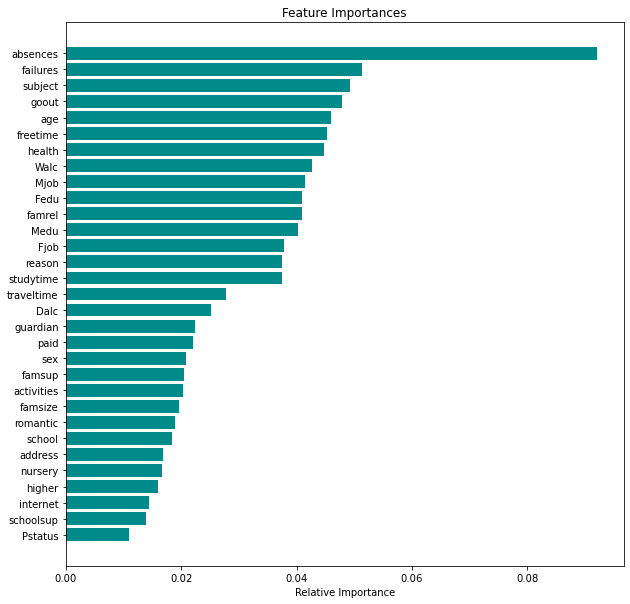

In [114]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#008B8B', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')

plt.savefig('../static/images/feature_importances.JPG')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.01,random_state=52)

# Different Models

## Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [117]:
classifier.fit(X2_train, y2_train)

/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
print(f"Training 2 Data Score: {classifier.score(X2_train, y2_train)}")
print(f"Testing 2 Data Score: {classifier.score(X2_test, y2_test)}")

Training 2 Data Score: 0.6602129719264279
Testing 2 Data Score: 0.9090909090909091


In [119]:
predictions2 = classifier.predict(X2_test)
predictions_table2=pd.DataFrame({"Predictions": predictions2, "Actual": y2_test})

In [120]:
predictions_table2

,Predictions,Actual
799,3,4
632,3,3
639,3,3
344,3,3
27,3,3
933,3,3
704,3,3
356,3,3
320,3,3
1038,3,3


In [121]:
# Save the model
# from joblib import dump, load

# dump(classifier, 'Lg.joblib') 


## Decision Tree Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X2_train, y2_train)
clf2.score(X2_train, y2_train)

0.9854791868344628

In [128]:
print(f"Training Data Score: {clf2.score(X2_train, y2_train)}")
print(f"Testing Data Score: {clf2.score(X2_test, y2_test)}")

Training Data Score: 0.9854791868344628
Testing Data Score: 0.5454545454545454


## Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=200)
rf2.fit(X2_train, y2_train)
rf2.score(X2_test, y2_test)

0.8181818181818182

In [129]:
print(f"Training Data Score: {rf2.score(X2_train, y2_train)}")
print(f"Testing Data Score: {rf2.score(X2_test, y2_test)}")

Training Data Score: 0.9854791868344628
Testing Data Score: 0.8181818181818182


In [91]:
feature_names2= X2.columns
sorted(zip(rf2.feature_importances_, feature_names2), reverse=True)

[(0.24901441115848202, 'health'),
 (0.22927978184132536, 'freetime'),
 (0.1967437650787951, 'Walc'),
 (0.17656504880717216, 'goout'),
 (0.14839699311422536, 'studytime')]

## KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X2_train)

In [131]:
X_train_scaled = X_scaler.transform(X2_train)
X_test_scaled = X_scaler.transform(X2_test)

In [132]:
train_scores = []
test_scores = []
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y2_train)
    train_score = knn.score(X_train_scaled, y2_train)
    test_score = knn.score(X_test_scaled, y2_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.985/0.455
k: 3, Train/Test Score: 0.752/0.545
k: 5, Train/Test Score: 0.701/0.727
k: 7, Train/Test Score: 0.693/0.818
k: 9, Train/Test Score: 0.682/0.909
k: 11, Train/Test Score: 0.674/0.909
k: 13, Train/Test Score: 0.677/0.909
k: 15, Train/Test Score: 0.672/0.909
k: 17, Train/Test Score: 0.660/0.909
k: 19, Train/Test Score: 0.666/0.909
k: 21, Train/Test Score: 0.665/0.909
k: 23, Train/Test Score: 0.663/0.909
k: 25, Train/Test Score: 0.662/0.909
k: 27, Train/Test Score: 0.661/0.909
k: 29, Train/Test Score: 0.661/0.909
k: 31, Train/Test Score: 0.665/0.909
k: 33, Train/Test Score: 0.665/0.909


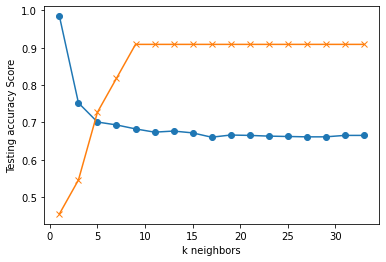

In [133]:
plt.plot(range(1, 35, 2), train_scores, marker='o')
plt.plot(range(1, 35, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [134]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y2_train)

KNeighborsClassifier()

In [136]:
print('k=5 Train Acc: %.3f' % knn.score(X_train_scaled, y2_train))
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y2_test))

k=5 Train Acc: 0.701
k=5 Test Acc: 0.727
